#Superstore **EDA FINAL**

Marie Brunet

##Summary

**Source**: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

**Description:**

Dataset containing Sales & Profits of a Superstore from 2012 to 2015.

**Key Data Fields Dictionary:**
* Order ID: Unique identifier for each order
* Order Date: Date when the order was placed
* Customer ID: Unique identifier for each customer
* Postal Code: Customer's postal code
* City: Customer's city
* State: Customer's state
* Country: Customer's country
* Category: Broad product category
* Sales: Total sales amount
* Profit: Profit made from the order


**Project Overview:**

This notebook aims to conduct a full Exploratory Data Analysis on the Global Superstore dataset. The process includes:
* Import Libraries and Set Notebook Defaults
* Data gathering and merging
* Data cleaning and preparation
* Exploratory data analysis using descriptive statistics and visualizations

#Import Libraries and Set Notebook Defaults

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Display all DataFrame columns
pd.set_option('display.max_columns', None)

#Set Pandas to display numberrs without scientific notation, with commas as thousands separators, and with two decimals
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Gathering and Merging

Merge the two sheets of the dataset into the df dataframe.

In [8]:
path = '/content/drive/MyDrive/Descriptive Analytics/Superstore EDA/data/Global_Superstore_Orders_2012_2015.xlsx'

#Store the excel file as a data frame
df = pd.read_excel(path)

#Store the second page of the excel sheet to df_people
df_people = pd.read_excel(path, sheet_name=1)

#Merge df with df_people and store it to df
df = df.merge(df_people, how='left', on='Region')

#Display the first 10 rows of the dataframe
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,Lindiwe Afolayan
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,Kauri Anaru
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,Oxana Lagunov
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High,Miina Nylund
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,Kauri Anaru
5,22254,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-PA-3990,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.24,2,0.10,15.34,1.80,Medium,Kauri Anaru
6,49550,CA-2012-MM726023-40910,2012-01-02,2012-01-06,Standard Class,MM-726023,Magdelene Morse,Consumer,NaN,St. Catharines,Ontario,Canada,Canada,USCA,TEC-MA-5503,Technology,Machines,"Okidata Inkjet, Wireless",314.22,1,0.00,3.12,24.10,Medium,NaN
7,20303,IN-2012-KN164507-40911,2012-01-03,2012-01-03,Same Day,KN-164507,Kean Nguyen,Corporate,NaN,Sydney,New South Wales,Australia,Oceania,Asia Pacific,OFF-AP-4733,Office Supplies,Appliances,"Hoover Microwave, White",276.10,1,0.10,110.41,125.32,Critical,Kauri Anaru
8,30450,ID-2012-KL1664592-40911,2012-01-03,2012-01-09,Standard Class,KL-1664592,Ken Lonsdale,Consumer,NaN,Papakura,Auckland,New Zealand,Oceania,Asia Pacific,TEC-CO-4593,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.46,4,0.40,-319.46,107.10,Low,Kauri Anaru
9,46681,IZ-2012-LW699061-40911,2012-01-03,2012-01-07,Standard Class,LW-699061,Lindsay Williams,Corporate,NaN,Mosul,Ninawa,Iraq,Western Asia,Asia Pacific,FUR-CH-5414,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",666.84,4,0.00,253.32,81.26,High,Kaoru Xun


#Data Cleaning and Preparation

* Check for inconsistencies or missing values
* Clean the data and set datatypes

In [9]:
#Inspect the data type of each field
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Postal Code,float64
City,object


In [10]:
#Check if there are any missing values
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,41296
City,0


In [11]:
#Display the non-null values and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

##__`Postal Code`__ field

### Examine __`Postal Code`__ Nulls and Data Type

In [12]:
#Total nulls for Postal Code
df['Postal Code'].isnull().sum()

41296

In [13]:
#View location columns for records where Postal Code is null
columns = ['Country', 'State', 'City', 'Postal Code']

mask = df['Postal Code'].isnull()

df[columns].loc[mask].head(20)

,Country,State,City,Postal Code
0,Algeria,Constantine,Constantine,NaN
1,Australia,New South Wales,Wagga Wagga,NaN
2,Hungary,Budapest,Budapest,NaN
3,Sweden,Stockholm,Stockholm,NaN
4,Australia,New South Wales,Wagga Wagga,NaN
5,Australia,New South Wales,Wagga Wagga,NaN
6,Canada,Ontario,St. Catharines,NaN
7,Australia,New South Wales,Sydney,NaN
8,New Zealand,Auckland,Papakura,NaN
9,Iraq,Ninawa,Mosul,NaN


In [14]:
#View location columns for records where Postal Code is NOT null
columns = ['Country', 'State', 'City', 'Postal Code']

mask = df['Postal Code'].notnull()

#df[columns].loc[mask].sort_values('Country').head(20)
df[columns].loc[mask].sort_values('Country').tail(20)

,Country,State,City,Postal Code
16535,United States,Florida,Miami,"33,178.00"
16513,United States,Michigan,Detroit,"48,227.00"
16412,United States,Ohio,Columbus,"43,229.00"
16414,United States,Oregon,Portland,"97,206.00"
16415,United States,Oregon,Portland,"97,206.00"
16417,United States,Virginia,Springfield,"22,153.00"
16418,United States,Virginia,Springfield,"22,153.00"
16426,United States,Ohio,Cincinnati,"45,231.00"
16433,United States,Delaware,Wilmington,"19,805.00"
16534,United States,Florida,Miami,"33,178.00"


In [15]:
#Get value_counts where Postal Code is NOT null
columns = ['Country', 'State', 'City', 'Postal Code']

mask = df['Postal Code'].notnull()

df[columns].loc[mask].value_counts()

Country        State       City               Postal Code
United States  New York    New York City      10,035.00      263
                                              10,024.00      230
                                              10,009.00      229
               California  San Francisco      94,122.00      203
               New York    New York City      10,011.00      193
                                                            ... 
               California  Ontario            91,761.00        1
                           Pico Rivera        90,660.00        1
               Illinois    Arlington Heights  60,004.00        1
               Texas       Keller             76,248.00        1
               Wyoming     Cheyenne           82,001.00        1
Name: count, Length: 632, dtype: int64

###Reformat __`Postal Code`__
* Set as text data type: **object, string**
* Ensure leading zeros are kept: for instance, __`01040`__
* Ensure nulls are recognizable as not applicable (for non-US addresses): __`na`__

In [16]:
# Ensure 'Postal Code' is always treated as a string
df['Postal Code'] = df['Postal Code'].astype(str)  # Convert everything to string

# Remove decimal points (caused by float conversion)
df['Postal Code'] = df['Postal Code'].str.replace('.0', '', regex=False)

# Ensure Postal Codes have at least 5 digits (padding with leading zeros if needed)
df['Postal Code'] = df['Postal Code'].str.zfill(5)

# Replace incorrect values (like '00nan')
df['Postal Code'] = df['Postal Code'].replace('00nan', 'na')

# Check the unique values to confirm the fix
df['Postal Code'].unique()

#Display 10 random rows of the dataframe
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
47769,3451,MX-2015-DR1294039-42321,2015-11-13,2015-11-17,Standard Class,DR-1294039,Daniel Raglin,Home Office,na,Sonsonate,Sonsonate,El Salvador,Central America,LATAM,TEC-CO-4568,Technology,Copiers,"Hewlett Copy Machine, Color",348.46,2,0.00,76.10,39.02,High,Nicodemo Bautista
26155,32132,CA-2014-JB15400140-41844,2014-07-24,2014-07-28,Standard Class,JB-154001408,Jennifer Braxton,Corporate,33614,Tampa,Florida,United States,Southern US,USCA,TEC-MA-6631,Technology,Machines,Zebra GX420t Direct Thermal/Thermal Transfer P...,265.48,1,0.50,-111.50,29.05,High,Flannery Newton
20773,20513,IN-2014-TC2129558-41676,2014-02-06,2014-02-11,Standard Class,TC-2129558,Toby Carlisle,Consumer,na,Hubli,Karnataka,India,Southern Asia,Asia Pacific,FUR-TA-4708,Furniture,Tables,"Hon Training Table, with Bottom Storage",998.10,3,0.00,419.13,61.25,Medium,Chandrakant Chaudhri
30130,10146,US-2014-BE1133518-41931,2014-10-19,2014-10-23,Standard Class,BE-1133518,Bill Eplett,Home Office,na,Pilar,Alagoas,Brazil,South America,LATAM,OFF-BI-3293,Office Supplies,Binders,"Avery Index Tab, Clear",7.72,5,0.60,-4.48,1.66,Medium,Vasco Magalhães
34942,27779,IN-2015-AM107057-42047,2015-02-12,2015-02-14,Second Class,AM-107057,Anne McFarland,Consumer,na,Brisbane,Queensland,Australia,Oceania,Asia Pacific,FUR-BO-5762,Furniture,Bookcases,"Safco Classic Bookcase, Pine","1,186.65",3,0.10,-39.60,77.32,Medium,Kauri Anaru
17487,24546,IN-2013-ER13855102-41585,2013-11-07,2013-11-11,Standard Class,ER-13855102,Elpida Rittenbach,Corporate,na,Manila,National Capital,Philippines,Southeastern Asia,Asia Pacific,FUR-FU-5721,Furniture,Furnishings,"Rubbermaid Clock, Erganomic",219.51,6,0.25,55.53,14.16,Medium,Preecha Metharom
38538,45854,ML-2015-AR54079-42148,2015-05-24,2015-05-26,Second Class,AR-54079,Andy Reiter,Consumer,na,Kayes,Kayes,Mali,Western Africa,Africa,OFF-PA-3989,Office Supplies,Paper,"Eaton Cards & Envelopes, Recycled",90.18,2,0.00,45.06,5.05,Medium,Katlego Akosua
6435,5355,MX-2012-MM1792093-41206,2012-10-24,2012-10-31,Standard Class,MM-1792093,Michael Moore,Consumer,na,Masaya,Masaya,Nicaragua,Central America,LATAM,TEC-AC-3389,Technology,Accessories,"Belkin Memory Card, Erganomic",675.72,9,0.00,175.68,46.83,Low,Nicodemo Bautista
4130,27997,IN-2012-GM1444027-41128,2012-08-07,2012-08-11,Second Class,GM-1444027,Gary McGarr,Consumer,na,Jinan,Shandong,China,Eastern Asia,Asia Pacific,OFF-BI-4825,Office Supplies,Binders,"Ibico Hole Reinforcements, Economy",27.96,4,0.00,3.24,2.35,High,Hadia Bousaid
26006,3281,MX-2014-JH1598539-41840,2014-07-20,2014-07-24,Standard Class,JH-1598539,Joseph Holt,Consumer,na,San Salvador,San Salvador,El Salvador,Central America,LATAM,TEC-PH-3130,Technology,Phones,"Apple Audio Dock, with Caller ID",222.52,2,0.00,55.60,16.68,Medium,Nicodemo Bautista


##__`Person`__ field

### Examine __`Person`__ Nulls

In [17]:
#Total nulls for Person
df['Person'].isnull().sum()

384

###Reformat __`Person`__

In [18]:
#Replace the nulls in the field Person to 'Unknown'
df.fillna({'Person': 'Uknown'}, inplace=True)

#Display 10 random rows of the dataframe
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
19975,45214,CG-2014-JS603033-41640,2014-01-01,2014-01-05,Standard Class,JS-603033,Joy Smith,Consumer,na,Kinshasa,Kinshasa,Democratic Republic of the Congo,Central Africa,Africa,FUR-FU-3067,Furniture,Furnishings,"Advantus Stacking Tray, Erganomic",23.40,1,0.00,7.23,3.64,High,Andile Ihejirika
49140,38232,CA-2015-BP11095140-42339,2015-12-01,2015-12-04,Second Class,BP-110951402,Bart Pistole,Corporate,79907,El Paso,Texas,United States,Central US,USCA,TEC-AC-5900,Technology,Accessories,SanDisk Ultra 64 GB MicroSDHC Class 10 Memory ...,95.98,3,0.20,-10.80,8.05,Medium,Lon Bonher
5851,36896,CA-2012-DO13435140-41184,2012-10-02,2012-10-02,Same Day,DO-134351406,Denny Ordway,Consumer,43229,Columbus,Ohio,United States,Eastern US,USCA,OFF-AR-4796,Office Supplies,Art,Hunt Boston Vacuum Mount KS Pencil Sharpener,55.98,2,0.20,4.20,14.44,High,Dolores Davis
39098,41995,IR-2015-DW348060-42160,2015-06-05,2015-06-08,First Class,DW-348060,Dianna Wilson,Home Office,na,Babol,Mazandaran,Iran,Southern Asia,Asia Pacific,OFF-FA-6190,Office Supplies,Fasteners,"Stockwell Paper Clips, Bulk Pack",27.24,2,0.00,13.02,4.21,High,Chandrakant Chaudhri
6479,21430,IN-2012-DB136607-41207,2012-10-25,2012-10-27,Second Class,DB-136607,Duane Benoit,Consumer,na,Gold Coast,Queensland,Australia,Oceania,Asia Pacific,TEC-CO-4780,Technology,Copiers,"HP Ink, Laser",347.49,3,0.10,-11.61,2.68,Medium,Kauri Anaru
25356,5626,MX-2014-JL1517551-41818,2014-06-28,2014-07-02,Standard Class,JL-1517551,James Lanier,Home Office,na,Villa Nueva,Guatemala,Guatemala,Central America,LATAM,FUR-FU-3038,Furniture,Furnishings,"Advantus Light Bulb, Durable",34.20,3,0.00,2.34,2.64,Medium,Nicodemo Bautista
2196,4243,MX-2012-BW1106598-41044,2012-05-15,2012-05-19,Standard Class,BW-1106598,Barry Weirich,Consumer,na,San Miguelito,Panama,Panama,Central America,LATAM,TEC-AC-4185,Technology,Accessories,"Enermax Router, Bluetooth",310.00,3,0.40,-118.88,48.76,High,Nicodemo Bautista
27344,38165,US-2014-SC20230140-41873,2014-08-22,2014-08-29,Standard Class,SC-202301404,Scot Coram,Corporate,90004,Los Angeles,California,United States,Western US,USCA,FUR-TA-3561,Furniture,Tables,Bretford CR8500 Series Meeting Room Furniture,"2,887.06",9,0.20,180.44,268.10,Low,Derrick Snyders
31828,26480,IN-2014-TB2159558-41968,2014-11-25,2014-11-29,Second Class,TB-2159558,Troy Blackwell,Consumer,na,Patna,Bihar,India,Southern Asia,Asia Pacific,FUR-FU-3028,Furniture,Furnishings,"Advantus Door Stop, Duo Pack",180.36,4,0.00,52.20,35.53,High,Chandrakant Chaudhri
35912,26471,ID-2015-MG17680144-42078,2015-03-15,2015-03-17,Second Class,MG-17680144,Maureen Gastineau,Home Office,na,Ho Chi Minh City,Ho Chí Minh City,Vietnam,Southeastern Asia,Asia Pacific,FUR-CH-5451,Furniture,Chairs,"Office Star Steel Folding Chair, Black",260.70,4,0.27,-75.06,24.98,High,Preecha Metharom


In [19]:
#Check if there are anymore missing values
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,0
City,0


##Adding calculated fields

###Profit Margin

In [20]:
#Adding the Profit Margin field
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

#Display 10 random rows of the dataframe
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person,Profit Margin (%)
44109,18268,ES-2015-AR1040545-42258,2015-09-11,2015-09-16,Standard Class,AR-1040545,Allen Rosenblatt,Corporate,na,Boulogne-sur-Mer,Nord-Pas-de-Calais-Picardie,France,Western Europe,Europe,TEC-AC-5887,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",110.70,2,0.00,17.70,6.84,Medium,Gilbert Wolff,15.99
36094,45350,CM-2015-MC813022-42082,2015-03-19,2015-03-23,Second Class,MC-813022,Mike Caudle,Corporate,na,Garoua,Nord,Cameroon,Central Africa,Africa,OFF-EN-5043,Office Supplies,Envelopes,"Kraft Peel and Seal, Set of 50",20.49,1,0.00,3.66,1.90,Medium,Andile Ihejirika,17.86
1192,25615,IN-2012-TS2150559-40990,2012-03-22,2012-03-25,First Class,TS-2150559,Tony Sayre,Consumer,na,Jakarta,Jakarta,Indonesia,Southeastern Asia,Asia Pacific,TEC-CO-3695,Technology,Copiers,"Canon Ink, Digital",136.51,1,0.07,26.41,22.55,High,Preecha Metharom,19.35
12300,5066,MX-2013-KF1628593-41431,2013-06-06,2013-06-07,First Class,KF-1628593,Karen Ferguson,Home Office,na,Managua,Managua,Nicaragua,Central America,LATAM,TEC-PH-3801,Technology,Phones,"Cisco Signal Booster, Full Size",102.08,1,0.00,39.80,24.09,High,Nicodemo Bautista,38.99
28103,18113,ES-2014-AF10870120-41888,2014-09-06,2014-09-10,Standard Class,AF-10870120,Art Ferguson,Consumer,na,Seville,Andalusía,Spain,Southern Europe,Europe,TEC-AC-5129,Technology,Accessories,"Logitech Mouse, USB",58.98,2,0.00,7.62,8.21,High,Gavino Bove,12.92
13575,16921,ES-2013-CJ11875139-41469,2013-07-14,2013-07-19,Standard Class,CJ-11875139,Carl Jackson,Corporate,na,Sheffield,England,United Kingdom,Northern Europe,Europe,OFF-BI-6370,Office Supplies,Binders,"Wilson Jones 3-Hole Punch, Durable",14.75,1,0.50,-8.57,1.60,Medium,Miina Nylund,-58.09
22318,51116,ZA-2014-JW6075146-41739,2014-04-10,2014-04-14,Second Class,JW-6075146,Julia West,Consumer,na,Lusaka,Lusaka,Zambia,Eastern Africa,Africa,FUR-FU-3930,Furniture,Furnishings,"Deflect-O Clock, Durable",189.36,4,0.00,60.48,4.93,High,Wasswa Ahmed,31.94
47491,7653,MX-2015-AF1088582-42316,2015-11-08,2015-11-14,Standard Class,AF-1088582,Art Foster,Consumer,na,Mexico City,Distrito Federal,Mexico,Central America,LATAM,FUR-FU-4043,Furniture,Furnishings,"Eldon Door Stop, Erganomic",39.02,2,0.40,-1.98,2.98,Medium,Nicodemo Bautista,-5.06
11090,16724,IT-2013-KM16720139-41386,2013-04-22,2013-04-27,Standard Class,KM-16720139,Kunst Miller,Consumer,na,Sheffield,England,United Kingdom,Northern Europe,Europe,OFF-BI-6379,Office Supplies,Binders,"Wilson Jones Binder, Durable",29.04,4,0.50,-26.76,1.83,Medium,Miina Nylund,-92.15
6312,28939,IN-2012-JO1528027-41200,2012-10-18,2012-10-25,Standard Class,JO-1528027,Jas O'Carroll,Consumer,na,Yichun,Jiangxi,China,Eastern Asia,Asia Pacific,OFF-AR-3502,Office Supplies,Art,"Binney & Smith Sketch Pad, Water Color",99.00,2,0.00,13.86,6.75,Medium,Hadia Bousaid,14.00


###Order Processing Time (Days)

In [21]:
#Adding the Order Processing Time (in days) field
df['Order Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

#Display 10 random rows of the dataframe
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person,Profit Margin (%),Order Processing Time
35206,49156,TZ-2015-JL5835129-42056,2015-02-21,2015-02-26,Standard Class,JL-5835129,John Lee,Consumer,na,Dar es Salaam,Dar Es Salaam,Tanzania,Eastern Africa,Africa,FUR-BO-3618,Furniture,Bookcases,"Bush 3-Shelf Cabinet, Traditional",573.48,4,0.00,126.12,49.58,Medium,Wasswa Ahmed,21.99,5
9929,35837,CA-2013-ES14080140-41331,2013-02-26,2013-03-02,Standard Class,ES-140801406,Erin Smith,Corporate,02908,Providence,Rhode Island,United States,Eastern US,USCA,FUR-TA-3335,Furniture,Tables,"Barricks 18"" x 48"" Non-Folding Utility Table w...",493.92,7,0.30,-28.22,78.50,High,Dolores Davis,-5.71,4
4659,16127,ES-2012-TM2101064-41147,2012-08-26,2012-09-01,Standard Class,TM-2101064,Tamara Manning,Consumer,na,Palermo,Sicily,Italy,Southern Europe,Europe,FUR-BO-3647,Furniture,Bookcases,"Bush Stackable Bookrack, Pine",630.15,5,0.00,132.30,41.00,Medium,Gavino Bove,21.00,6
31535,17366,ES-2014-RS1976545-41962,2014-11-19,2014-11-26,Standard Class,RS-1976545,Roland Schwarz,Corporate,na,Saint-Brieuc,Brittany,France,Western Europe,Europe,OFF-BI-3712,Office Supplies,Binders,"Cardinal 3-Hole Punch, Clear",197.82,7,0.00,41.37,22.65,Low,Gilbert Wolff,20.91,7
44970,2881,MX-2015-MB1808582-42272,2015-09-25,2015-09-30,Standard Class,MB-1808582,Mick Brown,Consumer,na,Nicolás Romero,México,Mexico,Central America,LATAM,TEC-CO-6009,Technology,Copiers,"Sharp Wireless Fax, Color",713.29,3,0.00,327.31,36.31,Medium,Nicodemo Bautista,45.89,5
21463,19955,ES-2014-MP1817548-41706,2014-03-08,2014-03-10,Second Class,MP-1817548,Mike Pelletier,Home Office,na,Gronau,North Rhine-Westphalia,Germany,Western Europe,Europe,OFF-EN-4454,Office Supplies,Envelopes,"GlobeWeis Peel and Seal, with clear poly window",124.65,5,0.00,6.15,5.29,High,Gilbert Wolff,4.93,2
49242,457,MX-2015-PM1894031-42340,2015-12-02,2015-12-06,Standard Class,PM-1894031,Paul MacIntyre,Consumer,na,Pinar del Río,Pinar del Río,Cuba,Caribbean,LATAM,TEC-CO-3600,Technology,Copiers,"Brother Ink, Digital",195.53,2,0.00,13.29,14.79,High,Marilène Rousseau,6.80,4
19323,2860,MX-2013-RB1970531-41625,2013-12-17,2013-12-21,Second Class,RB-1970531,Roger Barcio,Home Office,na,Guantánamo,Guantánamo,Cuba,Caribbean,LATAM,TEC-AC-5131,Technology,Accessories,"Logitech Numeric Keypad, Erganomic",147.10,5,0.00,73.50,4.45,Medium,Marilène Rousseau,49.97,4
21640,5662,MX-2014-PK1907593-41712,2014-03-14,2014-03-19,Standard Class,PK-1907593,Pete Kriz,Consumer,na,Managua,Managua,Nicaragua,Central America,LATAM,TEC-AC-5196,Technology,Accessories,"Memorex Flash Drive, USB",39.48,2,0.00,19.32,2.10,Medium,Nicodemo Bautista,48.94,5
17574,39939,CA-2013-NS18640140-41586,2013-11-08,2013-11-15,Standard Class,NS-186401408,Noel Staavos,Corporate,28540,Jacksonville,North Carolina,United States,Southern US,USCA,OFF-FA-5459,Office Supplies,Fasteners,OIC Binder Clips,31.50,11,0.20,11.81,1.96,Low,Flannery Newton,37.50,7


###Discounted Price

In [22]:
#Adding the Discounted Price field
df['Discounted Price'] = df['Sales'] * (1 - df['Discount'])

#Display 10 random rows of the dataframe
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person,Profit Margin (%),Order Processing Time,Discounted Price
32182,26529,ID-2014-MF1825059-41975,2014-12-02,2014-12-06,Standard Class,MF-1825059,Monica Federle,Corporate,na,Depok,Yogyakarta,Indonesia,Southeastern Asia,Asia Pacific,TEC-PH-5827,Technology,Phones,"Samsung Headset, with Caller ID",182.27,3,0.17,-22.03,14.76,Medium,Preecha Metharom,-12.09,4,151.28
178,32064,CA-2012-CS12250140-40922,2012-01-14,2012-01-16,Second Class,CS-122501408,Chris Selesnick,Corporate,71111,Bossier City,Louisiana,United States,Southern US,USCA,OFF-ST-4288,Office Supplies,Storage,Fellowes Stor/Drawer Steel Plus Storage Drawers,572.58,6,0.00,34.35,146.29,Critical,Flannery Newton,6.00,2,572.58
20208,43423,CG-2014-EH399033-41649,2014-01-10,2014-01-14,Standard Class,EH-399033,Erica Hackney,Consumer,na,Kananga,Kasai-Occidental,Democratic Republic of the Congo,Central Africa,Africa,OFF-BI-6405,Office Supplies,Binders,"Wilson Jones Index Tab, Recycled",6.81,1,0.00,1.89,1.74,Medium,Andile Ihejirika,27.75,4,6.81
10355,13672,ES-2013-AB10015139-41353,2013-03-20,2013-03-20,Same Day,AB-10015139,Aaron Bergman,Consumer,na,Southend-on-Sea,England,United Kingdom,Northern Europe,Europe,TEC-MA-5018,Technology,Machines,"Konica Receipt Printer, Durable",244.74,2,0.00,70.92,51.82,High,Miina Nylund,28.98,0,244.74
13467,13887,ES-2013-NP1832548-41466,2013-07-11,2013-07-15,Standard Class,NP-1832548,Naresj Patel,Consumer,na,Nuremberg,Bavaria,Germany,Western Europe,Europe,FUR-BO-5967,Furniture,Bookcases,"Sauder Library with Doors, Mobile","1,053.40",3,0.10,58.45,78.26,Medium,Gilbert Wolff,5.55,4,948.06
17146,16070,ES-2013-PR18880139-41577,2013-10-30,2013-11-01,First Class,PR-18880139,Patrick Ryan,Consumer,na,Edinburgh,Scotland,United Kingdom,Northern Europe,Europe,TEC-AC-5133,Technology,Accessories,"Logitech Numeric Keypad, USB",93.06,2,0.00,39.96,17.84,High,Miina Nylund,42.94,2,93.06
40027,44158,UP-2015-RA9885137-42176,2015-06-21,2015-06-27,Standard Class,RA-9885137,Ruben Ausman,Corporate,na,Poltava,Poltava,Ukraine,Eastern Europe,Europe,TEC-CO-3607,Technology,Copiers,"Brother Personal Copier, Laser",142.89,1,0.00,14.28,15.12,Medium,Oxana Lagunov,9.99,6,142.89
11502,23995,IN-2013-JM152657-41403,2013-05-09,2013-05-12,First Class,JM-152657,Janet Molinari,Corporate,na,Sydney,New South Wales,Australia,Oceania,Asia Pacific,OFF-PA-6613,Office Supplies,Paper,"Xerox Message Books, 8.5 x 11",22.06,1,0.10,-1.73,2.77,High,Kauri Anaru,-7.85,3,19.85
32176,24638,ID-2014-PC1900059-41975,2014-12-02,2014-12-05,First Class,PC-1900059,Pauline Chand,Home Office,na,Manado,Sulawesi Utara,Indonesia,Southeastern Asia,Asia Pacific,TEC-AC-5896,Technology,Accessories,"SanDisk Router, Programmable",136.66,1,0.47,-74.78,32.28,Critical,Preecha Metharom,-54.72,3,72.43
6345,30443,ID-2012-KT1648092-41201,2012-10-19,2012-10-23,Standard Class,KT-1648092,Kean Thornton,Consumer,na,Auckland,Auckland,New Zealand,Oceania,Asia Pacific,OFF-EN-4448,Office Supplies,Envelopes,"GlobeWeis Manila Envelope, Security-Tint",142.99,8,0.40,-95.33,7.76,Medium,Kauri Anaru,-66.67,4,85.80


#Exploratory data analysis using descriptive statistics and visualizations

##Visualizations
* Sales Distribution
* Top 10 Best-Selling Products
* Sales Trend Over Time
* Total Sales by Category
* Profit Margin Distribution
* Correlation Between Sales and Profit
* Sales Comparison by Product Category

In [23]:
# Generate summary statistics for numerical fields
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost,Profit Margin (%),Order Processing Time,Discounted Price
count,"51,290.00",51290,51290,"51,290.00","51,290.00","51,290.00","51,290.00","51,290.00","51,290.00","51,290.00","51,290.00"
mean,"25,645.50",2014-05-11 21:26:49.155780864,2014-05-15 20:42:42.745174528,246.49,3.48,0.14,28.61,26.48,4.74,3.97,220.24
min,1.00,2012-01-01 00:00:00,2012-01-03 00:00:00,0.44,1.00,0.00,"-6,599.98",1.00,-473.35,0.00,0.09
25%,"12,823.25",2013-06-19 00:00:00,2013-06-23 00:00:00,30.76,2.00,0.00,0.00,2.61,0.00,3.00,25.29
50%,"25,645.50",2014-07-08 00:00:00,2014-07-12 00:00:00,85.05,3.00,0.00,9.24,7.79,16.92,4.00,72.00
75%,"38,467.75",2015-05-22 00:00:00,2015-05-26 00:00:00,251.05,5.00,0.20,36.81,24.45,33.31,5.00,220.52
max,"51,290.00",2015-12-31 00:00:00,2016-01-07 00:00:00,"22,638.48",14.00,0.85,"8,399.98",933.57,50.00,7.00,"17,499.95"
std,"14,806.29",NaN,NaN,487.57,2.28,0.21,174.34,57.25,46.57,1.73,447.02


##Sales Distribution

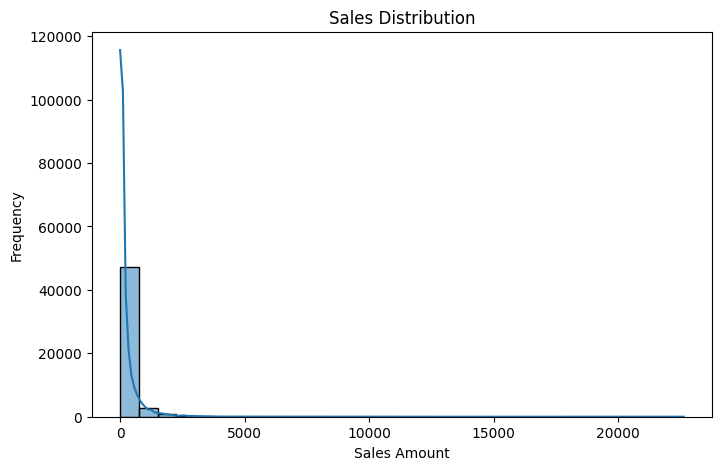

In [24]:
# Plot histogram of sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=30, kde=True)

#Titles and labels
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")

#Show the plot
plt.show()

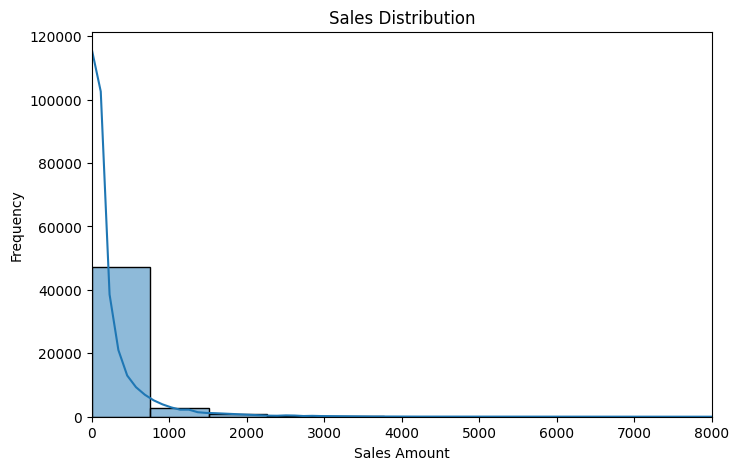

In [25]:
#Adjust the settings to see the x-axis values in more details

# Plot histogram of sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=30, kde=True)

# Set x-axis limit to stop at 5,000
plt.xlim(0, 8000)

# Titles and labels
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")

# Show the plot
plt.show()

This histogram shows that the majority of sales transactions are concentrated at lower amounts, with a peak frequency between USD 0 and USD 800. As sales amounts increase beyond USD 800, the frequency drops sharply, and very few transactions exceed USD 1,500, indicating that high-value sales are rare compared to lower-value ones.

##Top 10 Best-Selling Products

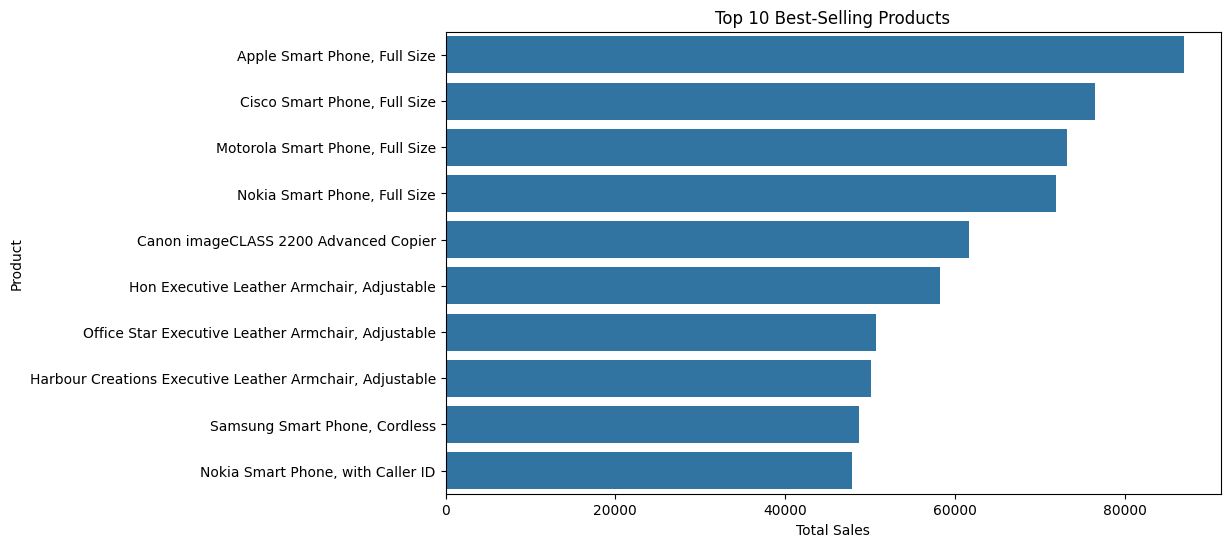

In [26]:
# Identify top-selling products
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)

# Plot top products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)

# Titles and labels
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product")

# Show the plot
plt.show()

This bar chart displays the top 10 best-selling products, which all have total sales higher than around 40,500.

##Sales Trend Over Time

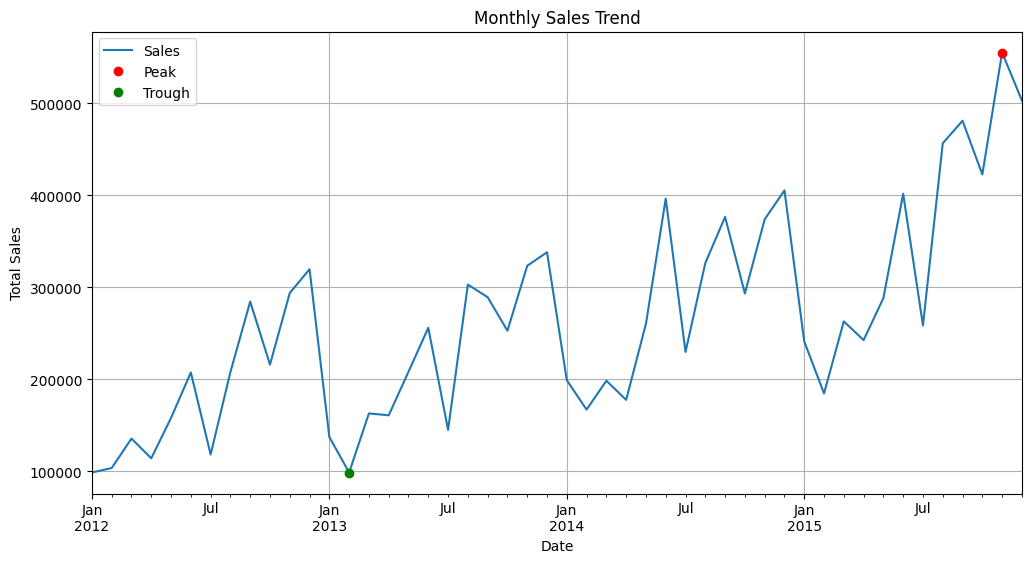

In [27]:
# Aggregate monthly sales data
sales_trend = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
sales_trend.plot()

#Highlight maximum and minimum values
plt.plot(sales_trend.idxmax(), sales_trend.max(), 'ro', label='Peak')
plt.plot(sales_trend.idxmin(), sales_trend.min(), 'go', label='Trough')
plt.legend()

# Titles and labels
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")

#Display the grid
plt.grid()

#Show the plot
plt.show()

This line chart shows that the sales were always going down between December and February of each year, as well as in July of each year, and were the highest in June and December of each year. The lowest sales were 100,000 in February 2013, and the highest sales were around 550,000 in November 2015. Overall the sales went up over time, starting at 100,000 in January 2012, and ending at 500,000 in December of 2015.

##Total Sales by Category

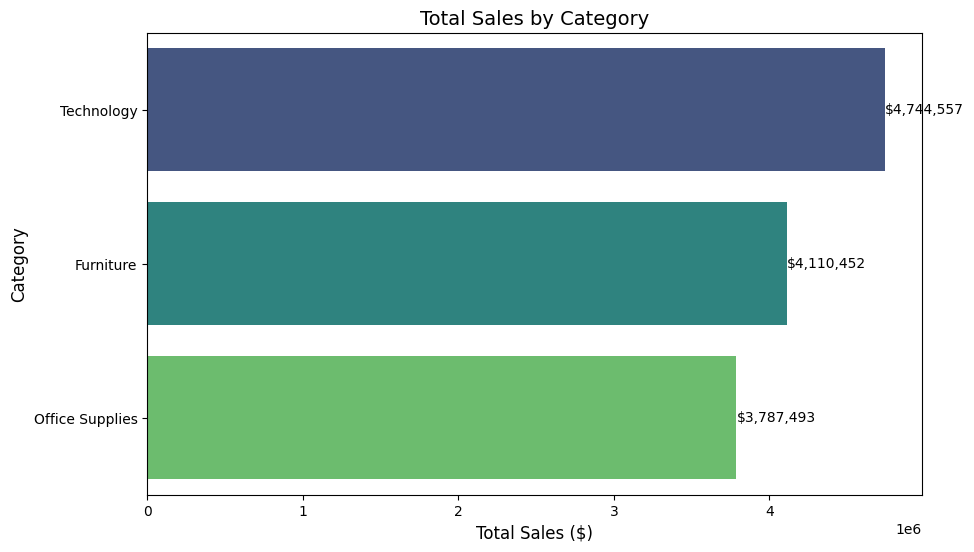

In [28]:
# Group sales by Category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Sort by sales for better visualization
category_sales = category_sales.sort_values(by='Sales', ascending=False)

# Create a bar chart with annotations
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Sales', y='Category', hue='Category', palette='viridis', legend=False)

# Add annotations
for index, value in enumerate(category_sales['Sales']):
    plt.text(value + 500, index, f'${value:,.0f}', va='center', fontsize=10)

# Formatting
plt.title('Total Sales by Category', fontsize=14)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Show plot
plt.show()

This bar chart shows that the category that had the highest sales was Technology, with a total sales value of USD 4,744,557. The second one is the Furniture category, with a total sales value of USD 4,110,452. The third and last one is the Office Supplies, with a total sales value of USD 3,787,493.

##Profit Margin Distribution

##Correlation Between Sales and Profit

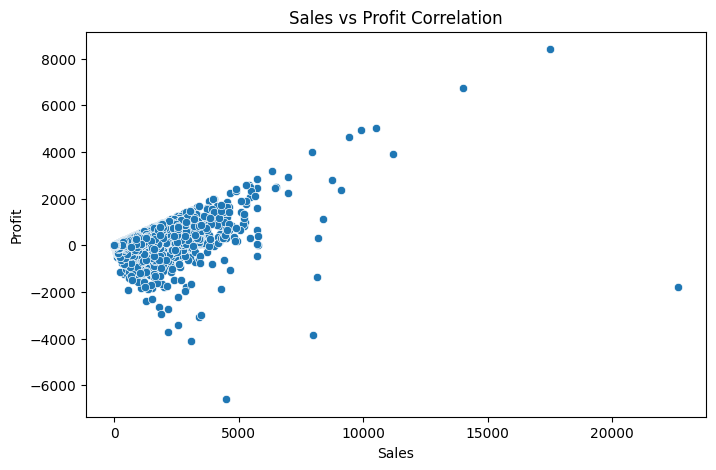

In [29]:
# Scatter plot for sales vs profit
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Sales'], y=df['Profit'])

# Titles and labels
plt.title("Sales vs Profit Correlation")
plt.xlabel("Sales")
plt.ylabel("Profit")

# Show the plot
plt.show()

This scatter plot shows that most transactions have sales between USD 0 and USD 5,000 and profits between USD -3,000 and USD 3,000, indicating that the majority of sales generate moderate profits or losses. A few isolated points at higher sales values suggest that large sales transactions are less common and may result in either significant profits or losses.

##Sales Comparison by Product Category

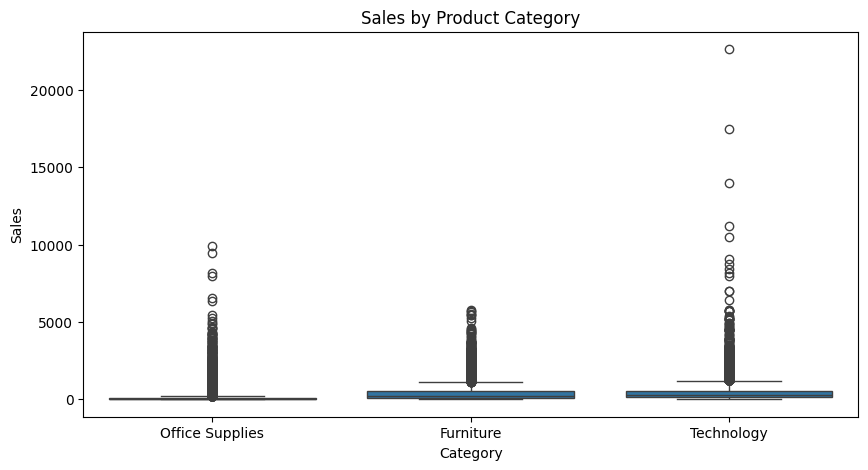

In [30]:
# Boxplot of sales by category
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Category'], y=df['Sales'])

# Titles and labels
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Sales")

#Show the plot
plt.show()

The boxplot shows that most sales in all three categories are concentrated below USD 6,000, with the Technology and Office Supplies categories having occasional high-value outliers, especially in Technology, where some sales reach up to around USD 23,000. In contrast, the Furniture category lacks extreme outliers, suggesting that its sales are more consistently distributed within a moderate range.